In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('Cameraman.png', cv2.IMREAD_GRAYSCALE)

In [3]:
if img is None:
    print('Error: Unable to load the image.')
else:
    GF = cv2.GaussianBlur(img,(0,0),2)  #Gaussian blur with a kernal size of(0,0) and standard deviation 2

In [4]:
MF = cv2.medianBlur(img,3)  #Median blur with a kernal size of 3

In [6]:
DF = cv2.getGaussianKernel(5,-1)  #Creater a 5x1 Gaussian kernal

In [7]:
DF = np.outer(DF,DF.transpose())  #Create a 5x5 filter by taking outer product

In [8]:
DFR = cv2.filter2D(img, -1, DF,borderType = cv2.BORDER_REPLICATE)  #Appling the disk filter

In [9]:
#hIGH-PASS FILTER(eDGE DETECTION, SHARPENING)
#Unsharp mask(high-pass filter)
UM = cv2.filter2D(img, -1, cv2.getGaussianKernel(5, -1)*(-1), borderType = cv2.BORDER_REPLICATE) 

In [10]:
#sobel filter(high-pass filter)for horizontal edge detection
SF = cv2.Sobel(img, cv2.CV_64F, 1,0,ksize=3)  #Apply sobel filter in the horizontal direction(dx =1, dy=0)

In [12]:
#Prewitt filter(high-pass filter)for horizontal edge detection
PF = cv2.filter2D(img, -1,np.array([[-1,0,1],[-1,0,1],[-1,0,1]]),borderType=cv2.BORDER_REPLICATE)  #Prewitt filter for edge detection

ValueError: num must be an integer with 1 <= num <= 6, not 7

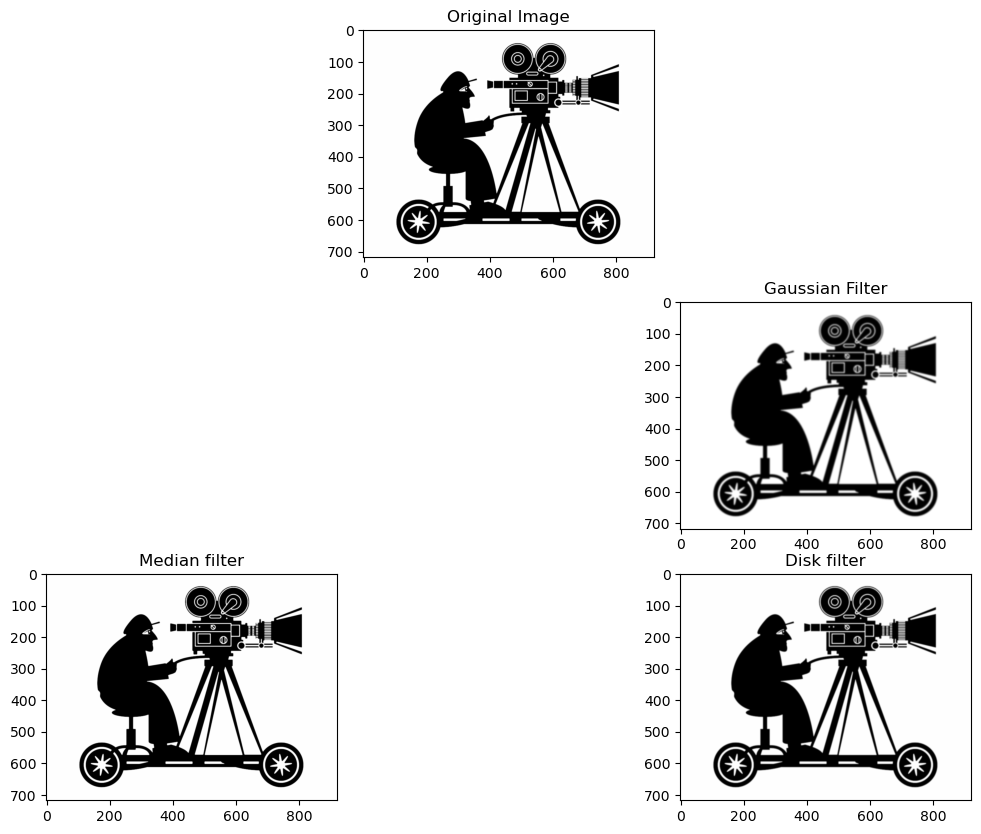

In [21]:
#Plotting the result
plt.figure(figsize=(15,10))
#Display the result of the Gaussian filter

plt.subplot(2,3,1)
plt.imshow(GF, cmap = 'gray')
plt.title('Gaussian Filter')


plt.subplot(2,3,2)
plt.imshow(MF, cmap = 'gray')
plt.title('Median filter')

plt.subplot(2,3,3)
plt.imshow(DFR, cmap = 'gray')
plt.title('Disk filter')

plt.subplot(2,3,4)
plt.imshow(UM, cmap = 'gray')
plt.title('Unsharp Mask')

plt.subplot(2,3,5)
plt.imshow(SF, cmap = 'gray')
plt.title('Soble Horizontal edge-emphasing filter')

plt.subplot(2,3,6)
plt.imshow(PF, cmap = 'gray')
plt.title('Prewitt Horizontal Edge-Emplasizing Filter')

plt.show()
